In [1]:
%pylab inline
import pandas as pd
import tensorflow as tf
from tensorflow import keras

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
housing= fetch_california_housing()

In [4]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characte

In [5]:
housing.data.shape

(20640, 8)

In [6]:
housing.target.shape

(20640,)

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test=train_test_split(housing.data, housing.target)
x_train, x_valid, y_train, y_valid=train_test_split(x_train, y_train)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_valid=scaler.transform(x_valid)
x_test=scaler.transform(x_test)


In [11]:
x_train.shape

(11610, 8)

In [12]:
x_valid.shape

(3870, 8)

In [13]:
x_test.shape

(5160, 8)

# Lets Create model structure

In [14]:
model=keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)    
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


# Lets Compile our model

In [16]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(0.001),
              metrics=['mae'])

In [17]:
model_history=model.fit(x_train, y_train, epochs=30,
                        validation_data=(x_valid,y_valid))


Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 1.7733 - mae: 0.9719 - val_loss: 0.7910 - val_mae: 0.6502
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6828 - mae: 0.6092 - val_loss: 0.6836 - val_mae: 0.5993
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6194 - mae: 0.5798 - val_loss: 0.6394 - val_mae: 0.5739
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5845 - mae: 0.5611 - val_loss: 0.6091 - val_mae: 0.5628
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5599 - mae: 0.5493 - val_loss: 0.5868 - val_mae: 0.5484
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5392 - mae: 0.5367 - val_loss: 0.5658 - val_mae: 0.5393
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5242 - mae: 0.5295 - val_loss: 0.5503 - val_mae: 0.5302
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.

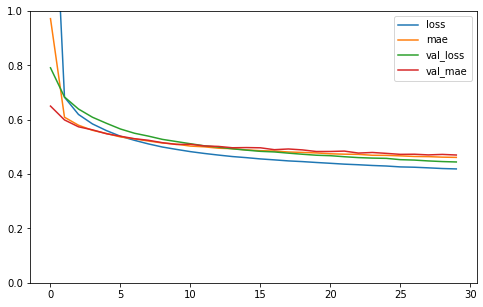

In [18]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
mea_test=model.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4064 - mae: 0.4587


In [20]:
model_history.history

{'loss': [1.7733124494552612,
  0.6828385591506958,
  0.6193872690200806,
  0.5845084190368652,
  0.5599406957626343,
  0.5392098426818848,
  0.5242384076118469,
  0.5109407901763916,
  0.49949881434440613,
  0.49080291390419006,
  0.4825826585292816,
  0.47587060928344727,
  0.469937801361084,
  0.46449628472328186,
  0.4604410231113434,
  0.4557715952396393,
  0.45226728916168213,
  0.44849443435668945,
  0.44590991735458374,
  0.4426584839820862,
  0.4396754503250122,
  0.4365384876728058,
  0.4343501925468445,
  0.4316456615924835,
  0.4296626150608063,
  0.42639434337615967,
  0.4252004027366638,
  0.4229363799095154,
  0.42042648792266846,
  0.4189649522304535],
 'mae': [0.9718914031982422,
  0.6092042922973633,
  0.5797958970069885,
  0.5611121654510498,
  0.5492755770683289,
  0.5366711020469666,
  0.5295488834381104,
  0.5216385722160339,
  0.5144171714782715,
  0.5100125074386597,
  0.5029930472373962,
  0.5002132654190063,
  0.4951518774032593,
  0.49347352981567383,
  0.489

In [21]:
x_new=x_test[:3]
y_pred=model.predict(x_new)

In [22]:
y_pred

array([[2.3074307],
       [3.3658736],
       [2.5753267]], dtype=float32)

In [23]:
y_test[:3]

array([3.296, 3.384, 2.167])

# Let use Functional API

In [24]:
del model

In [25]:
x_train.shape[1:]

(8,)

In [26]:
keras.backend.clear_session()

In [27]:
input_=keras.layers.Input(shape=x_train.shape[1:])
hidden1=keras.layers.Dense(30, activation= "relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_, hidden2])
output=keras.layers.Dense(1)(concat)

model2=keras.models.Model(inputs=[input_], outputs=[output])

In [28]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

# Lets Compile the Data

In [29]:
model2.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(0.001),
              metrics=['mae'])

In [30]:
model_history1=model2.fit(x_train, y_train, epochs=40, validation_data=(x_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 3ms/step - loss: 1.5241 - mae: 0.8943 - val_loss: 0.8486 - val_mae: 0.6673
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.7281 - mae: 0.6288 - val_loss: 0.7389 - val_mae: 0.6104
Epoch 3/40
363/363 [==============================] - 1s 3ms/step - loss: 0.6588 - mae: 0.5911 - val_loss: 0.6816 - val_mae: 0.5873
Epoch 4/40
363/363 [==============================] - 1s 3ms/step - loss: 0.6125 - mae: 0.5671 - val_loss: 0.6367 - val_mae: 0.5646
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5815 - mae: 0.5508 - val_loss: 0.6047 - val_mae: 0.5500
Epoch 6/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5578 - mae: 0.5382 - val_loss: 0.5801 - val_mae: 0.5414
Epoch 7/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5410 - mae: 0.5297 - val_loss: 0.5621 - val_mae: 0.5315
Epoch 8/40
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [31]:
model2.evaluate(x_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.4142 - mae: 0.4607


[0.41417407989501953, 0.46073058247566223]

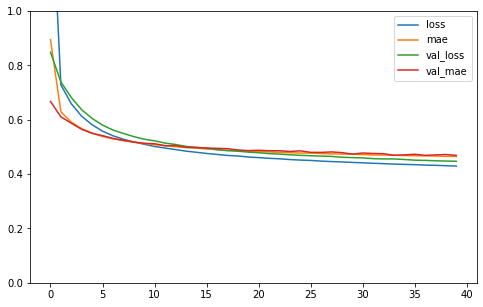

In [32]:
pd.DataFrame(model_history1.history).plot(figsize=(8,5))
plt.grid=True
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model_history1.history

{'loss': [1.5241433382034302,
  0.7281047105789185,
  0.6587681770324707,
  0.6125198006629944,
  0.581488311290741,
  0.557823121547699,
  0.5410223603248596,
  0.5281887650489807,
  0.5182536840438843,
  0.5098378658294678,
  0.5015090107917786,
  0.4958544373512268,
  0.4902167022228241,
  0.48448795080184937,
  0.4803445041179657,
  0.47591128945350647,
  0.47229140996932983,
  0.4686177372932434,
  0.46654701232910156,
  0.4628440737724304,
  0.4606492519378662,
  0.45799362659454346,
  0.45627808570861816,
  0.4535086750984192,
  0.45149704813957214,
  0.4502125680446625,
  0.4477425217628479,
  0.4460195302963257,
  0.4446794092655182,
  0.4429008364677429,
  0.44142791628837585,
  0.43988037109375,
  0.4383465349674225,
  0.43675532937049866,
  0.435666561126709,
  0.4345501661300659,
  0.43305492401123047,
  0.43224090337753296,
  0.4308406114578247,
  0.42947131395339966],
 'mae': [0.8943289518356323,
  0.6288211941719055,
  0.591090977191925,
  0.5671197772026062,
  0.550783

# Saving & Restoring

In [34]:
model2.save("model2_Housepricing.h5")

In [35]:
%pwd

'C:\\Users\\Bhumihar Rakesh\\Desktop\\Python\\Deep Learning'

In [36]:
%cd C:\Users\Bhumihar Rakesh\Desktop\Python\Deep Learning

C:\Users\Bhumihar Rakesh\Desktop\Python\Deep Learning


In [37]:
del model2

In [38]:
keras.backend.clear_session()

In [39]:
model3=keras.models.load_model("model2_Housepricing.h5")

In [40]:
model3.summary(0)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

# CallBacks function is very usefull to save your model with each epoch run

In [41]:
model_new=keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)    
])

In [42]:
model_new.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(0.001),
              metrics=['mae'])

# we are creating call back so that we can see each epoch and that is also get saved in %Pwd.
("model_new-{epoch:02d}.h5") in this "model_new" is file name & {epoch:02d} is with each epoch run it will save file with name model_new_01 and 02d represent with number of digit like if you run epoch with 3 digit like 300 then you have to mention 03d

In [43]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("model_new-{epoch:02d}.h5")

In [44]:
model_history=model_new.fit(x_train, y_train, epochs=10,
                        validation_data=(x_valid,y_valid),
                        callbacks=[checkpoint_cb])


Epoch 1/10
363/363 [==============================] - 2s 7ms/step - loss: 2.2160 - mae: 1.1102 - val_loss: 1.0337 - val_mae: 0.7761
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.9609 - mae: 0.7054 - val_loss: 0.7814 - val_mae: 0.6616
Epoch 3/10
363/363 [==============================] - 2s 6ms/step - loss: 0.7335 - mae: 0.6400 - val_loss: 0.7243 - val_mae: 0.6179
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6775 - mae: 0.6092 - val_loss: 0.6862 - val_mae: 0.6002
Epoch 5/10
363/363 [==============================] - 2s 4ms/step - loss: 0.6418 - mae: 0.5908 - val_loss: 0.6565 - val_mae: 0.5811
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.6141 - mae: 0.5744 - val_loss: 0.6317 - val_mae: 0.5714
Epoch 7/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5916 - mae: 0.5635 - val_loss: 0.6106 - val_mae: 0.5607
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.

In [45]:
del model_new

In [46]:
keras.backend.clear_session()

In [56]:
model_new=keras.models.load_model("model_new-10.h5")

In [57]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_new.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.5247 - mean_absolute_error: 0.5302


[0.5247257351875305, 0.5302442312240601]

# Save_best_only =True

We have seen that we are able to save 10 model in our directory but what if you get your best model at 8 epoch so for that we will use "save_best_only=True"

In [59]:
del model_new

In [60]:
keras.backend.clear_session()

In [61]:
model_new=keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)    
])

In [62]:
model_new.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(0.001),
              metrics=['mae'])

# While you callback you need to mention the file name as best_model and save_best_only= True

In [64]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [65]:
model_history=model_new.fit(x_train, y_train, epochs=10,
                        validation_data=(x_valid,y_valid),
                        callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5196 - mae: 0.5249 - val_loss: 0.5437 - val_mae: 0.5220
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5083 - mae: 0.5186 - val_loss: 0.5305 - val_mae: 0.5163
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4988 - mae: 0.5113 - val_loss: 0.5209 - val_mae: 0.5169
Epoch 4/10
363/363 [==============================] - 2s 5ms/step - loss: 0.4910 - mae: 0.5079 - val_loss: 0.5122 - val_mae: 0.5104
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4846 - mae: 0.5027 - val_loss: 0.5073 - val_mae: 0.5040
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4783 - mae: 0.4998 - val_loss: 0.4989 - val_mae: 0.4991
Epoch 7/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4719 - mae: 0.4949 - val_loss: 0.4930 - val_mae: 0.5000
Epoch 8/10
363/363 [==============================] - 1s 4ms/step - loss: 0.

In [66]:
model_new=keras.models.load_model("Best_Model.h5")

In [67]:
model_new.evaluate(x_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4407 - mean_absolute_error: 0.4794


[0.44065314531326294, 0.47939708828926086]

# Save_Best_only =Model by= Early_stoping (callback function)

In [68]:
del model_new

In [73]:
keras.backend.clear_session()

In [74]:
model_new=keras.models.Sequential([
    keras.layers.Dense(30, activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)    
])

In [75]:
model_new.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(0.001),
              metrics=['mae'])

To save your model you have to call callback function and with that file name "Early_stoping_Best_Model.h5"

In [85]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("Early_Best_Model.h5", save_best_only=True)

we willl use early_stopping_cb variable with patience 10, It means once you can best model it will check for 10 other epoch to find best value and ince it find best value it will early stop

In [87]:
early_stoping_cb=keras.callbacks.EarlyStopping(patience=10,
                                               restore_best_weights=True)

In [84]:
model_history=model_new.fit(x_train, y_train, epochs=300,
                        validation_data=(x_valid,y_valid),
                        callbacks=[checkpoint_cb,early_stoping_cb])

Epoch 1/300
363/363 [==============================] - 1s 3ms/step - loss: 0.3077 - mae: 0.3871 - val_loss: 0.3361 - val_mae: 0.3983
Epoch 2/300
363/363 [==============================] - 1s 4ms/step - loss: 0.3076 - mae: 0.3867 - val_loss: 0.3356 - val_mae: 0.3996
Epoch 3/300
363/363 [==============================] - 2s 5ms/step - loss: 0.3073 - mae: 0.3871 - val_loss: 0.3355 - val_mae: 0.3973
Epoch 4/300
363/363 [==============================] - 2s 4ms/step - loss: 0.3072 - mae: 0.3869 - val_loss: 0.3391 - val_mae: 0.3955
Epoch 5/300
363/363 [==============================] - 2s 5ms/step - loss: 0.3071 - mae: 0.3866 - val_loss: 0.3384 - val_mae: 0.3955
Epoch 6/300
363/363 [==============================] - 1s 4ms/step - loss: 0.3066 - mae: 0.3856 - val_loss: 0.3375 - val_mae: 0.3957
Epoch 7/300
363/363 [==============================] - 1s 3ms/step - loss: 0.3069 - mae: 0.3867 - val_loss: 0.3384 - val_mae: 0.3950
Epoch 8/300
363/363 [==============================] - 2s 5ms/step - 

363/363 [==============================] - 1s 4ms/step - loss: 0.2902 - mae: 0.3739 - val_loss: 0.3231 - val_mae: 0.3902
Epoch 124/300
363/363 [==============================] - 2s 5ms/step - loss: 0.2903 - mae: 0.3739 - val_loss: 0.3232 - val_mae: 0.3881
Epoch 125/300
363/363 [==============================] - 2s 5ms/step - loss: 0.2912 - mae: 0.3741 - val_loss: 0.3238 - val_mae: 0.3882
Epoch 126/300
363/363 [==============================] - 2s 5ms/step - loss: 0.2906 - mae: 0.3739 - val_loss: 0.3228 - val_mae: 0.3884
Epoch 127/300
363/363 [==============================] - 1s 4ms/step - loss: 0.2897 - mae: 0.3737 - val_loss: 0.3250 - val_mae: 0.3871
Epoch 128/300
363/363 [==============================] - 2s 4ms/step - loss: 0.2901 - mae: 0.3737 - val_loss: 0.3231 - val_mae: 0.3875
Epoch 129/300
363/363 [==============================] - 2s 5ms/step - loss: 0.2932 - mae: 0.3748 - val_loss: 0.3247 - val_mae: 0.3857
Epoch 130/300
363/363 [==============================] - 1s 4ms/step 

As you can see that with 300 epoch model is early stop with minimum val_loss 0.3200 and with patience hyperparamete with check for another 10 validation of data

In [89]:
#model_new=keras.models.load_model("Early_Best_Model.h5")

In [ ]:
#model_new.evaluate(x_test, y_test)